# Final Report: Analyzing Curriculum Logs

## Goal

Answer a list of questions for supervisor that need to be answered before the board meeting on Thursday morning.

### Import

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

# Import acquire and prepare
import acquire
import prepare

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Acquire

In [2]:
# Load currciculum access logs
df_codeup_logs = acquire.get_codeup_data()

# Load cohort data
df_cohorts = acquire.get_cohort_data()

In [3]:
# Currciculum Acccess Logs Dataset
print(df_codeup_logs.shape)
df_codeup_logs.head()

(719459, 6)


,date,time,page_viewed,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [4]:
# Cohorts Dataset
print(df_cohorts.shape)
df_cohorts

(46, 5)


,cohort_id,name,start_date,end_date,program_id
0,1,Arches,2014-02-04,2014-04-22,1
1,2,Badlands,2014-06-04,2014-08-22,1
2,3,Carlsbad,2014-09-04,2014-11-05,1
3,4,Denali,2014-10-20,2015-01-18,1
4,5,Everglades,2014-11-18,2015-02-24,1
5,6,Franklin,2015-02-03,2015-05-26,1
6,7,Glacier,2015-06-05,2015-10-06,1
7,8,Hampton,2015-09-22,2016-02-06,1
8,9,Apollo,2015-03-30,2015-07-29,4
9,10,Balboa,2015-11-03,2016-03-11,4


### Prepare

In [5]:
# Load merged data sets
df_merged = prepare.prep_codeup_data()

In [6]:
# Merged Dataset
print(df_merged.shape)
df_merged.head()

(559194, 9)


,page_viewed,user_id,cohort_id,ip,ip_int,cohort_name,start_date,end_date,program_id
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,971051961,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,971051961,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,971051961,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61,971051961,Teddy,2018-01-08,2018-05-17,2.0
2018-01-26 09:56:41,javascript-i/loops,2,22,97.105.19.61,971051961,Teddy,2018-01-08,2018-05-17,2.0


In [7]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 559194 entries, 2018-01-26 09:56:02 to 2020-11-02 16:48:47
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   page_viewed  559193 non-null  object        
 1   user_id      559194 non-null  int64         
 2   cohort_id    559194 non-null  int64         
 3   ip           559194 non-null  object        
 4   ip_int       559194 non-null  int64         
 5   cohort_name  522272 non-null  object        
 6   start_date   522272 non-null  datetime64[ns]
 7   end_date     522272 non-null  datetime64[ns]
 8   program_id   522272 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(3)
memory usage: 42.7+ MB


In [8]:
df_merged.describe() 

,user_id,cohort_id,ip_int,program_id
count,559194.000000,559194.000000,5.591940e+05,522272.000000
mean,406.029598,35.242499,1.470028e+10,2.049063
std,203.927807,17.546714,3.818664e+10,0.385684
min,1.000000,0.000000,6.625790e+05,1.000000
25%,259.000000,24.000000,9.710520e+08,2.000000
50%,422.000000,32.000000,9.710520e+08,2.000000
75%,576.000000,53.000000,6.711113e+09,2.000000
max,786.000000,62.000000,2.212292e+11,4.000000


In [9]:
df_merged.nunique() 

page_viewed    1718
user_id         761
cohort_id        39
ip             3787
ip_int         3787
cohort_name      38
start_date       38
end_date         38
program_id        4
dtype: int64

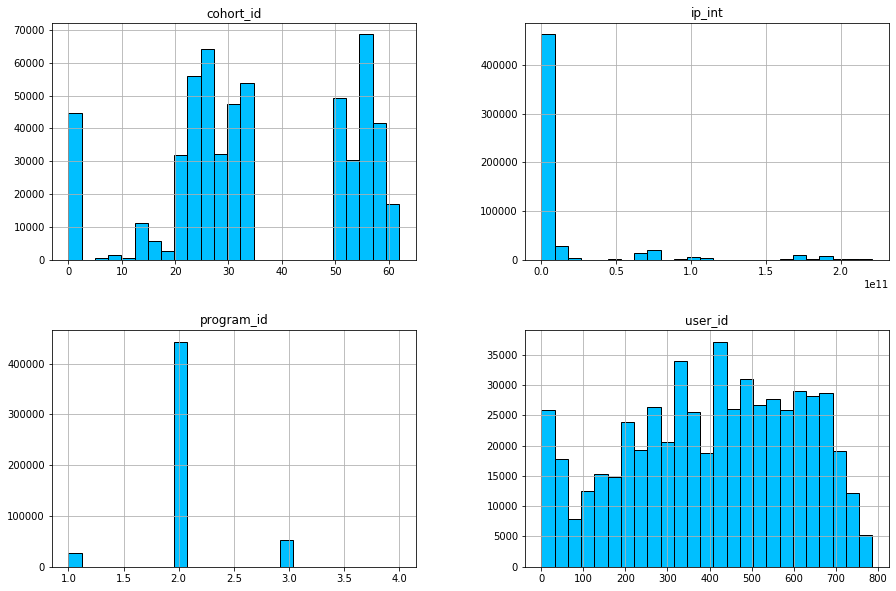

In [10]:
df_merged.hist(figsize=(15, 10),
            color='deepskyblue',
            ec='black',
            grid=True,
            bins=25);

In [11]:
# Create seperate dataframes for Web Development and Data Science programs
WD = df_merged[df_merged.program_id != 3]
DS = df_merged[df_merged.program_id == 3]

In [12]:
WD.head()

,page_viewed,user_id,cohort_id,ip,ip_int,cohort_name,start_date,end_date,program_id
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,971051961,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,971051961,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,971051961,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61,971051961,Teddy,2018-01-08,2018-05-17,2.0
2018-01-26 09:56:41,javascript-i/loops,2,22,97.105.19.61,971051961,Teddy,2018-01-08,2018-05-17,2.0


In [13]:
DS.head()

,page_viewed,user_id,cohort_id,ip,ip_int,cohort_name,start_date,end_date,program_id
2019-08-20 09:40:28,3-sql/1-mysql-overview,470,34,97.105.19.58,971051958,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:40:30,2-storytelling/bad-charts,467,34,97.105.19.58,971051958,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:41:02,1-fundamentals/1.1-intro-to-data-science,469,34,97.105.19.58,971051958,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:41:28,1-fundamentals/1.1-intro-to-data-science,480,34,97.105.19.58,971051958,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:41:36,1-fundamentals/1.1-intro-to-data-science,482,34,97.105.19.58,971051958,Bayes,2019-08-19,2020-01-30,3.0


### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

### 1. Web Development

In [14]:
# Pages with most traffic
pd.DataFrame(WD.page_viewed.value_counts().head()).rename(columns={'page_viewed':'count'})

,count
javascript-i,13278
java-iii,9923
html-css,9811
java-ii,9486
spring,8995


Text(0, 0.5, 'Number of Page Visits')

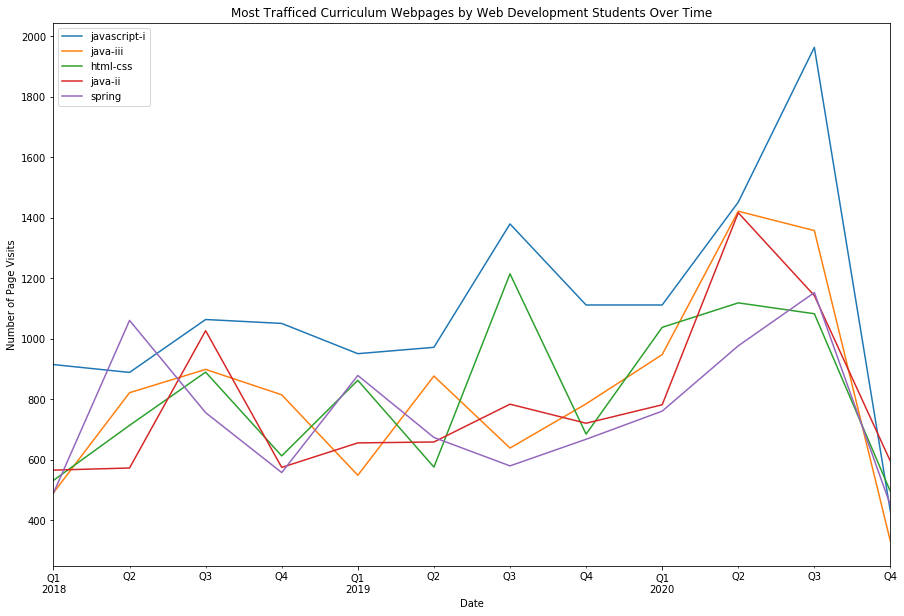

In [15]:
plt.figure(figsize=(15,10))
WD[WD.page_viewed == 'javascript-i'].page_viewed.resample('Q').count().plot()
WD[WD.page_viewed == 'java-iii'].page_viewed.resample('Q').count().plot()
WD[WD.page_viewed == 'html-css'].page_viewed.resample('Q').count().plot()
WD[WD.page_viewed == 'java-ii'].page_viewed.resample('Q').count().plot()
WD[WD.page_viewed == 'spring'].page_viewed.resample('Q').count().plot()
plt.legend(labels = ['javascript-i', 'java-iii', 'html-css', 'java-ii', 'spring'])
plt.title('Most Trafficed Curriculum Webpages by Web Development Students Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Page Visits')

### 1. Data Science

In [16]:
# Pages with most traffic
pd.DataFrame(DS.page_viewed.value_counts().head()).rename(columns={'page_viewed':'count'})

,count
1-fundamentals/1.1-intro-to-data-science,1536
6-regression/1-overview,1123
classification/overview,860
10-anomaly-detection/1-overview,742
3-sql/1-mysql-overview,704


Text(0, 0.5, 'Number of Page Visits')

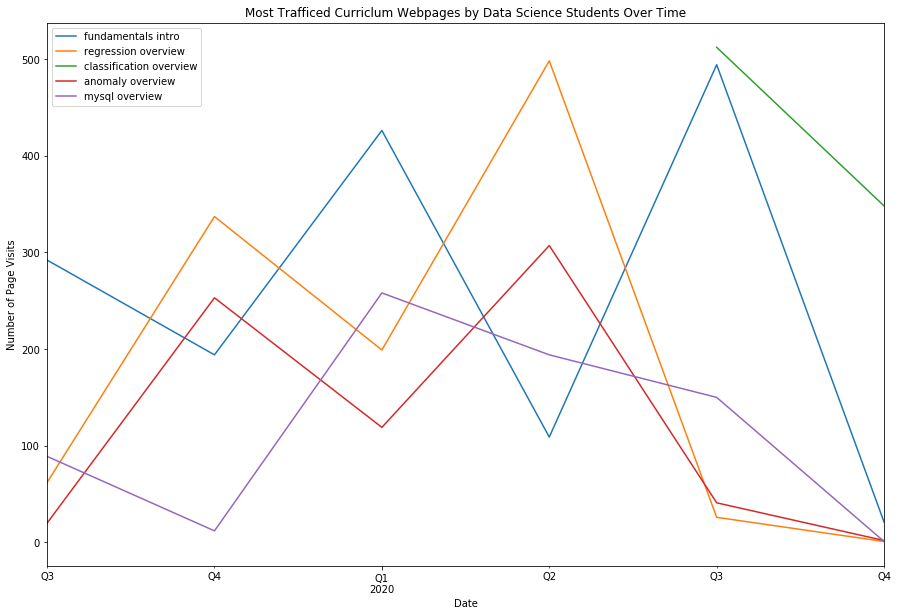

In [17]:
plt.figure(figsize=(15,10))
DS[DS.page_viewed == '1-fundamentals/1.1-intro-to-data-science'].page_viewed.resample('Q').count().plot()
DS[DS.page_viewed == '6-regression/1-overview'].page_viewed.resample('Q').count().plot()
DS[DS.page_viewed == 'classification/overview'].page_viewed.resample('Q').count().plot()
DS[DS.page_viewed == '10-anomaly-detection/1-overview'].page_viewed.resample('Q').count().plot()
DS[DS.page_viewed == '3-sql/1-mysql-overview'].page_viewed.resample('Q').count().plot()
plt.legend(labels = ['fundamentals intro', 'regression overview', 'classification overview', 'anomaly overview', 'mysql overview'])
plt.title('Most Trafficed Curriclum Webpages by Data Science Students Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Page Visits')

### Answer: 
   - WD: javascript-i
   - DS: 1-fundamentals/1.1-intro-to-data-science

### 2.	Is there a cohort that referred to a lesson significantly more that other cohorts seemed to gloss over? 

### 2. Web Development

In [18]:
# Web Development cohorts that referred to a given lesson significantly more 
pd.DataFrame(WD.groupby('cohort_name').page_viewed.value_counts().sort_values(ascending=False).head())

,,page_viewed
cohort_name,page_viewed,
Ceres,javascript-i,977
Hyperion,javascript-i,884
Voyageurs,javascript-i,884
Lassen,index.html,877
Zion,javascript-i,868


### 2. Data Science

In [19]:
# Data Science cohorts that referred to a given lesson significantly more
pd.DataFrame(DS.groupby('cohort_name').page_viewed.value_counts().sort_values(ascending=False).head())

,,page_viewed
cohort_name,page_viewed,
Darden,classification/overview,759
Bayes,1-fundamentals/1.1-intro-to-data-science,615
Curie,6-regression/1-overview,595
Darden,classification/scale_features_or_not.svg,590
Bayes,6-regression/1-overview,521


### Answer: 

Top 3 Web Development Cohorts with 'javascript-i' searches 
- Ceres, Hyperion, and Voyageurs	

Top 3 Data Science Cohorts with various searches 
- Darden, Bayes, and Curie	

### 3.	Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students? 

### 3. Web Development

In [20]:
# Filter dataframe for the time when student were 'active' for each program
active_WD = WD.loc[(WD.index >= WD.start_date) & (WD.index <= WD.end_date)]
active_DS = DS.loc[(DS.index >= DS.start_date) & (DS.index <= DS.end_date)]

In [21]:
# WD users with lowest page count
hardly_access_WD = active_WD.groupby('user_id').size().sort_values().head(10)
hardly_access_WD

user_id
278     3
539     3
388     7
572    11
340    13
64     13
24     17
49     20
41     22
772    24
dtype: int64

### 3. Data Science

In [22]:
# DS users with lowest page count
hardly_access_DS = active_DS.groupby('user_id').size().sort_values().head(10)
hardly_access_DS

user_id
679      4
697      7
785     28
780     41
783     50
781     79
683    102
577    190
693    284
477    327
dtype: int64

### Answer: 
- WD: Users ids who were least active while enrolled (278, 539, 388)
- DS: Users ids who were least active while enrolled (679, 697, 785)

### 4.	Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses? Any odd user-agents? 

### Web Development

In [23]:
import requests

In [24]:
df_suspcious_users = df_merged.copy()

ip_count = df_suspcious_users.ip.nunique()
ip_count

3787

In [25]:
df_suspcious_users.tail()

,page_viewed,user_id,cohort_id,ip,ip_int,cohort_name,start_date,end_date,program_id
2020-11-02 16:48:13,javascript-i/coffee-project,763,62,107.192.148.199,107192148199,Jupiter,2020-09-21,2021-03-30,2.0
2020-11-02 16:48:17,javascript-i/mapbox-api,771,62,172.125.226.175,172125226175,Jupiter,2020-09-21,2021-03-30,2.0
2020-11-02 16:48:18,javascript-i/coffee-project,771,62,172.125.226.175,172125226175,Jupiter,2020-09-21,2021-03-30,2.0
2020-11-02 16:48:28,javascript-i/bom-and-dom/bom,771,62,172.125.226.175,172125226175,Jupiter,2020-09-21,2021-03-30,2.0
2020-11-02 16:48:47,javascript-i/bom-and-dom/bom,763,62,107.192.148.199,107192148199,Jupiter,2020-09-21,2021-03-30,2.0


In [26]:
url = 'http://ip-api.com/csv/107.192.148.199'
response = requests.get(url)
location = response.text
location

'success,United States,US,TX,Texas,San Antonio,78201,29.4698,-98.5357,America/Chicago,"AT&T Services, Inc.",AT&T Corp,"AS7018 AT&T Services, Inc.",107.192.148.199\n'

In [27]:
url = 'http://ip-api.com/csv/221.229.204.176'
response = requests.get(url)
location = response.text
location

'success,China,CN,JS,Jiangsu,Xuzhou,,34.1534,117.178,Asia/Shanghai,CHINANET jiangsu province network,,AS4134 CHINANET-BACKBONE,221.229.204.176\n'

### Answer: 
- Suspicious IP from China

### 5.	At some point in the last year, ability for students and alumni to cross-access curriculum (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before? 

In [28]:
# Number of cross-accessed pages in the last year
df_merged[2020:].groupby('page_viewed').size().index.isin(df_merged[2020:].groupby('page_viewed').size().index).sum()

1714

In [29]:
# Unique pages in a list of WD and DS
WD_users = list(WD.user_id.unique())
DS_users = list(DS.user_id.unique())

In [30]:
# All cross accessed observations
cross_observations = df_merged[2020:][(df_merged[2020:].page_viewed.isin(WD[2020:].page_viewed)) & (df_merged[2020:].page_viewed.isin(DS[2020:].page_viewed))]
cross_observations

,page_viewed,user_id,cohort_id,ip,ip_int,cohort_name,start_date,end_date,program_id
2018-01-31 01:44:14,javascript-ii,42,21,72.181.118.217,72181118217,Sequoia,2017-09-27,2018-02-15,2.0
2018-01-31 01:44:44,git/cli,42,21,72.181.118.217,72181118217,Sequoia,2017-09-27,2018-02-15,2.0
2018-01-31 06:43:35,javascript-i,25,22,97.105.19.61,971051961,Teddy,2018-01-08,2018-05-17,2.0
2018-01-31 07:40:41,javascript-i,74,0,70.117.6.133,701176133,NaN,NaT,NaT,NaN
2018-01-31 07:54:22,javascript-i/conditionals,3,22,72.191.29.130,7219129130,Teddy,2018-01-08,2018-05-17,2.0
...,...,...,...,...,...,...,...,...,...
2020-11-02 16:13:52,java-iii,747,61,70.125.129.102,70125129102,Bash,2020-07-20,2021-01-21,2.0
2020-11-02 16:18:30,spring,733,61,107.77.220.169,10777220169,Bash,2020-07-20,2021-01-21,2.0
2020-11-02 16:34:16,javascript-i/bom-and-dom/dom,773,62,70.121.201.159,70121201159,Jupiter,2020-09-21,2021-03-30,2.0
2020-11-02 16:47:42,jquery,771,62,172.125.226.175,172125226175,Jupiter,2020-09-21,2021-03-30,2.0


In [31]:
# Cohorts who cross accessed
cross_observations.cohort_name.value_counts()

Bayes         18048
Darden        15975
Curie         13196
Ceres          8317
Zion           8068
Voyageurs      7931
Fortuna        7436
Hyperion       6622
Xanadu         6603
Apex           6490
Ganymede       6423
Deimos         6150
Betelgeuse     6077
Teddy          5836
Ulysses        5180
Andromeda      4907
Europa         4853
Wrangell       4806
Yosemite       4039
Lassen         2646
Bash           2341
Arches         2060
Jupiter        1794
Sequoia        1778
Olympic         850
Pinnacles       529
Hampton         362
Niagara         280
Kings           189
Quincy          119
Glacier         111
Mammoth         101
Ike              91
Joshua           20
Franklin         20
Badlands          6
Name: cohort_name, dtype: int64

### Answer: 
- Most cross observations from Bayes cohort

### 6.	What topics are grads continuing to reference after graduation and into their jobs (for each program)? 

In [32]:
# Filter dataframes for data points only after graduation date
postgrad_access_wd = WD[(WD.index > WD.end_date)]
postgrad_access_ds = DS[(DS.index > DS.end_date)]

### 6. Web Development

In [33]:
postgrad_access_wd.page_viewed.value_counts().head()

javascript-i    2541
spring          2458
html-css        1952
java-i          1905
java-ii         1841
Name: page_viewed, dtype: int64

### 6. Data Science

In [34]:
postgrad_access_ds.page_viewed.value_counts()[3:8]

6-regression/1-overview                     86
10-anomaly-detection/1-overview             69
fundamentals/intro-to-data-science          63
3-sql/1-mysql-overview                      59
classification/scale_features_or_not.svg    52
Name: page_viewed, dtype: int64

### Answer: 
- WD: javascript-i, spring, and html-css
- DS: regression, anomaly detection overview, and fundamentals intro 

### 7.	Which lessons are least accessed? 

### 7. Web Development

In [35]:
WD.page_viewed.value_counts().tail()

content/examples/php/arithmetic.php    1
Clustering_Intro_Module                1
stats/hypothesis-testing-overview      1
datascience                            1
annotations                            1
Name: page_viewed, dtype: int64

### 7. Data Science

In [36]:
DS.page_viewed.value_counts().tail()

index.html                                                     1
anomaly-detection/time-series-anomaly-detection-part-1         1
spring/extra-features/error-pages                              1
Index.html                                                     1
10-anomaly-detection/3-discrete-probabilistic-methods.ipynb    1
Name: page_viewed, dtype: int64

### Answer: 
- WD: wp-login, content/javascript/arrays, and login.aspx
- DS: bad-charts, 2-storytelling, and itc%20-%20ml

### 8.	Anything else I should be aware of? 

### Answer: 
- Future investigation should be done on suspicious accounts from foreign countries

# Summary

#### 1.	Which lesson appears to attract the most traffic consistently across cohorts (per program)?
   - WD: javascript-i
   - DS: 1-fundamentals/1.1-intro-to-data-science

#### 2.	Is there a cohort that referred to a lesson significantly more that other cohorts seemed to gloss over? 
- WD: Top 3 Web Development Cohorts with 'javascript-i' searches 
    - Ceres, Hyperion, and Voyageurs

- DS: Top 3 Data Science Cohorts with various searches
    - Darden, Bayes, and Curie


#### 3.	Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students? 
- WD: Users ids who were least active while enrolled (278, 539, 388)
- DS: Users ids who were least active while enrolled (679, 697, 785)


#### 4.	Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses? Any odd user-agents? 

- Suspicious IP from China

#### 5.	At some point in the last year, ability for students and alumni to cross-access curriculum (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before? 

- Most cross observations from Bayes cohort

#### 6.	What topics are grads continuing to reference after graduation and into their jobs (for each program)? 
- WD: javascript-i, spring, and html-css
- DS: regression, anomaly detection overview, and fundamentals intro 


#### 7.	Which lessons are least accessed? 
- WD: wp-login, content/javascript/arrays, and login.aspx
- DS: bad-charts, 2-storytelling, and itc%20-%20ml


#### 8.	Anything else I should be aware of? 
- Future investigation should be done on suspicious accounts from foreign countries
